In [1]:
# Import all nessesary libraries
import json
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from itertools import combinations
import networkx as nx
import netwulf as nw
import community as community_louvain
from wordcloud import WordCloud, STOPWORDS
from ast import literal_eval
import shifterator as sh
import random
from PIL import Image

In [2]:
df = pd.read_csv('./Data/matched_con_data.csv',low_memory = False)
df.head()

,Department,ATC_ID,ATC5,Medicine_name,Generic_name,Trade_name,Date,Strength,Strength_measure,Type_of_Medicine,Way,Number_ordinations,Dosis,Dosis_measure,Adm_way,Key,Strength1,Strength2
0,"AHOC, The Department of Anesthesiology",254.0,A04AA01,"ONDANSETRON INJ.VÃ†SKE, OPLÃ˜SNING 2 MG/ML",Ondansetron,Ondansetron,2022-01-01,2,MGM,IntravenÃ¸s anvendelse,IP,1,4,mg,IV,"['A04AA01', '2', 'MGM', 'IV']",_,NaN
1,"AHOC, The Department of Anesthesiology",1553.0,C07AG01,"LABETALOL INJ.-/INF.VSK.,OPL. 5 MG/ML",Labetalol,Labetalol,2022-01-01,5,MGM,IntravenÃ¸s anvendelse,IP,1,10,mg,IV,"['C07AG01', '5', 'MGM', 'IV']",_,NaN
2,"AHOC, The Department of Anesthesiology",254.0,A04AA01,ONDANSETRON FILMOVERTRUKNE TABL. 4 MG,Ondansetron,Ondansetron,2022-01-01,4,MG,Oral anvendelse,IP,1,4,mg,OR,"['A04AA01', '4', 'MG', 'OR']",_,NaN
3,"AHOC, The Department of Anesthesiology",254.0,A04AA01,"ONDANSETRON INJ.VÃ†SKE, OPLÃ˜SNING 2 MG/ML",Ondansetron,Ondansetron,2022-01-01,2,MGM,IntravenÃ¸s anvendelse,IP,1,1,mg,IV,"['A04AA01', '2', 'MGM', 'IV']",_,NaN
4,"AHOC, The Department of Anesthesiology",254.0,A04AA01,ONDANSETRON SMELTETABLETTER 4 MG,Ondansetron,Ondansetron,2022-01-01,4,MG,Sublingual anvendelse,IP,1,4,mg,OR,"['A04AA01', '4', 'MG', 'OR']",_,NaN


In [6]:
# Create WordCloud for entire dataset
full_text = " "
for index, row in df.iterrows():
    full_text += str(row['Generic_name']) + " "


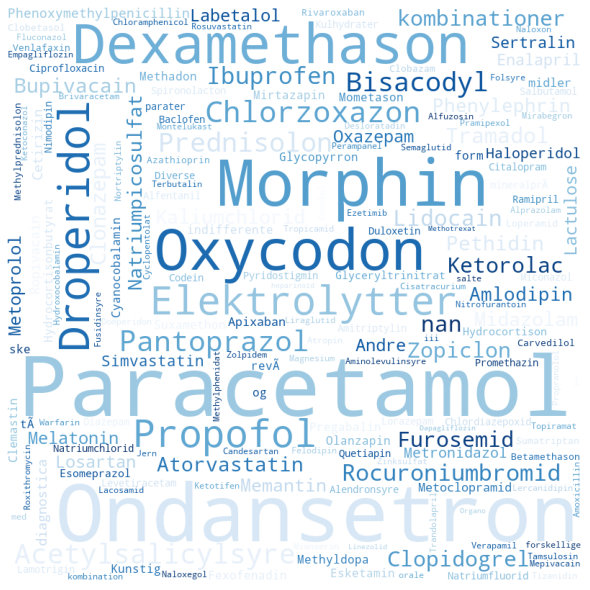

In [7]:
c = plt.cm.get_cmap('Blues')
wc = WordCloud(width = 800, height = 800, collocations=False, colormap = c.reversed(),
                    background_color ='white',
                    min_font_size = 10).generate(full_text)

        
# Plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('./Figures/wc_all.png')

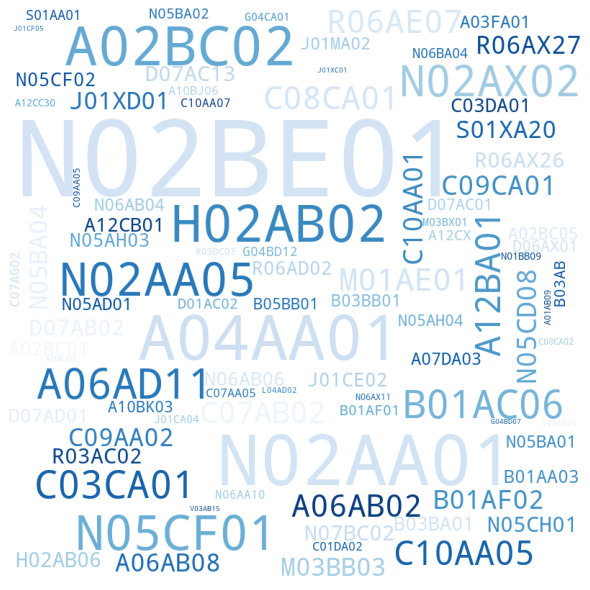

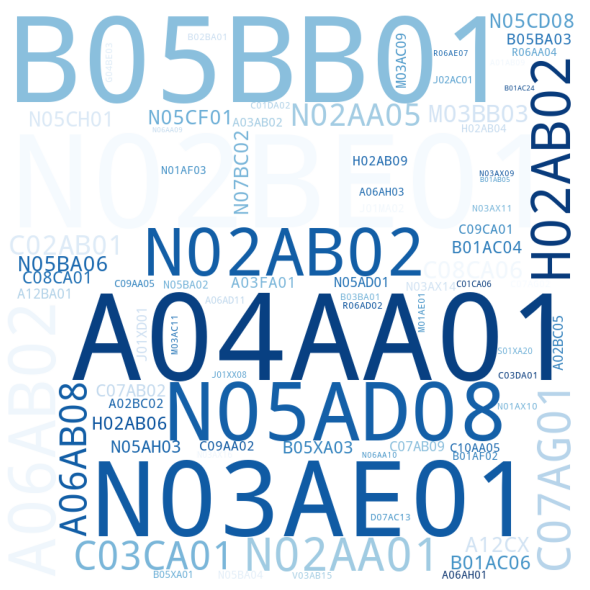

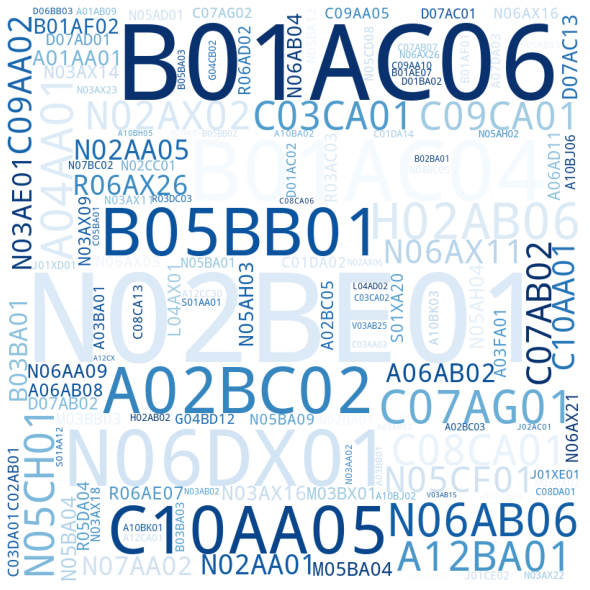

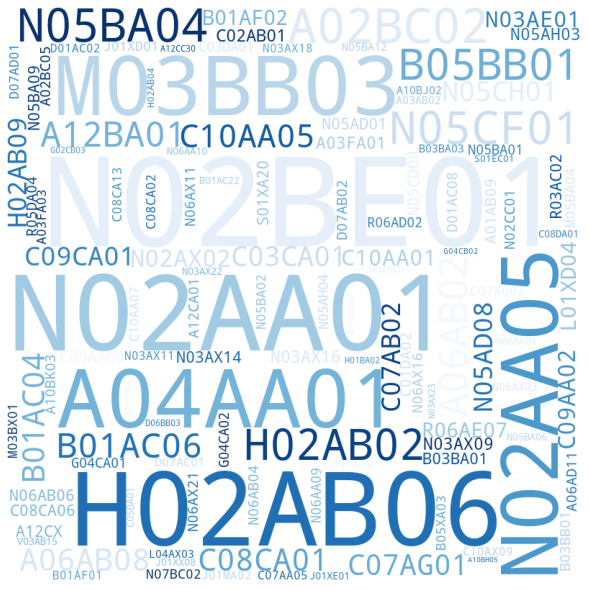

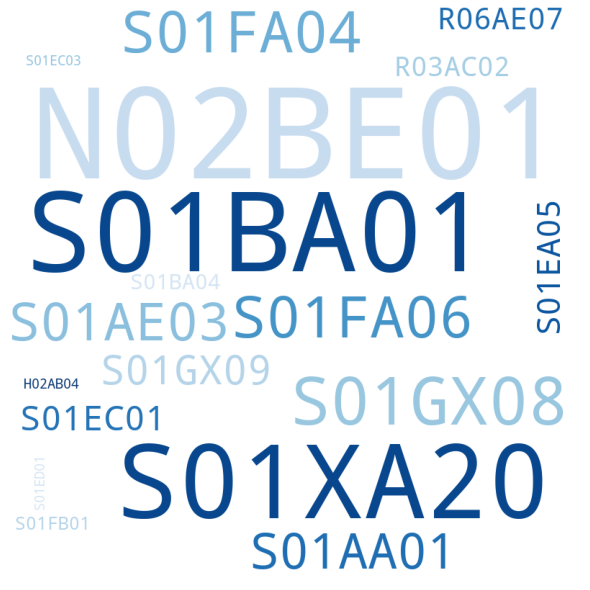

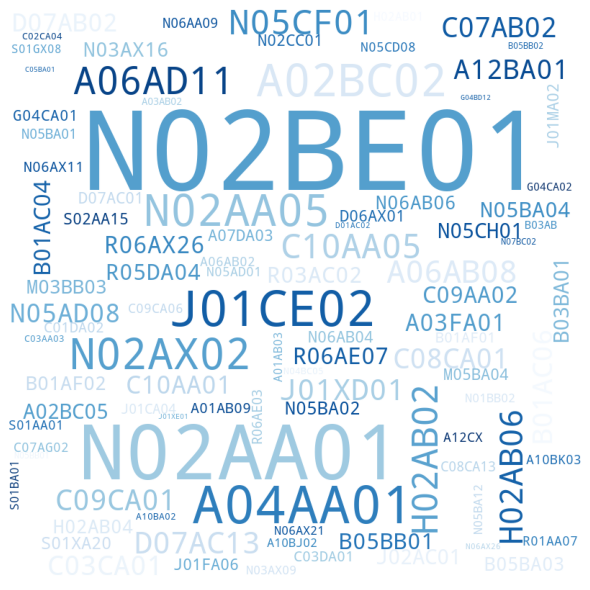

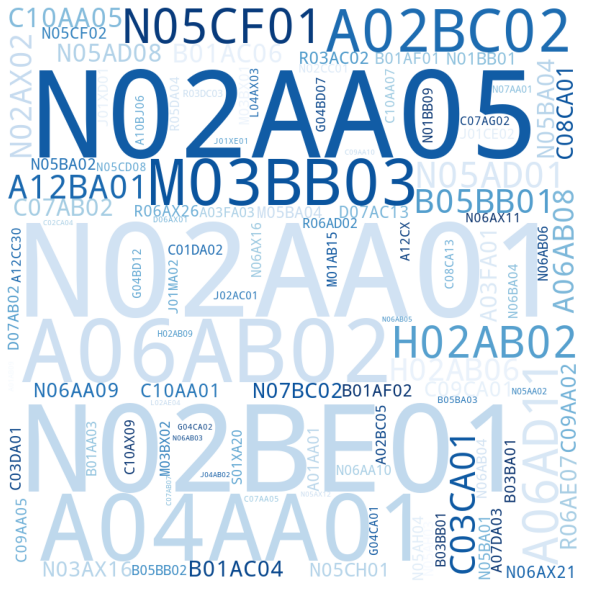

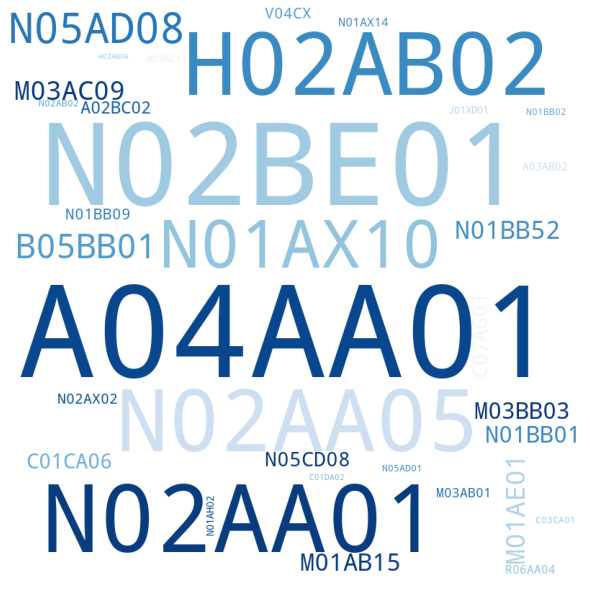

In [8]:
# Create WordCloud for entire dataset
for i,dep in enumerate(list(set(df['Department']))):
    df1 = df[df['Department'] == dep]
    full_text = " "
    for index, row in df1.iterrows():
        full_text += row['ATC5'] + " "
    c = plt.cm.get_cmap('Blues')
    wc = WordCloud(width = 800, height = 800, collocations=False, colormap = c.reversed(),
                        background_color ='white',
                        min_font_size = 10).generate(full_text)


    # Plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig('./Figures/wc_{}.png'.format(i))